# A Simple Linear Regression from scratch

## Objective:

The goal is to create a salary estimator based on years of experience of the employees of an anonymous company, using a simple Linear Regression Model build from scratch applied on "Salary_Data.csv" Kaggle's dataset. Then I will compare the performance of the model against the prebuilt Sklearn linear regression model.<br/>

I won't explain theory here, only background basic equations needed for code understanding.

![png](img/linear_regression.png)

---

## Table of contents

1. Dataset
2. Linear model definition
3. Loss function definition
4. Gradient definition
5. Gradient descent algorithm
6. Training the model on data
7. Model evaluation
8. Comparison with Sklearn model
9. Conclusion

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.Dataset

The dataset is constituted of “YearsExperience” and “Salary” informations for 30 employees in an anonymous company.<br/>

Get the original dataset here: https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression

### Importing dataset

In [121]:
df = pd.read_csv("data/Salary_Data.csv", delimiter= ',')

A simple dataframe visualization using markdown format:

In [3]:
import tabulate
print(df.head(7).to_markdown())

|    |   YearsExperience |   Salary |
|---:|------------------:|---------:|
|  0 |               1.1 |    39343 |
|  1 |               1.3 |    46205 |
|  2 |               1.5 |    37731 |
|  3 |               2   |    43525 |
|  4 |               2.2 |    39891 |
|  5 |               2.9 |    56642 |
|  6 |               3   |    60150 |


A better visualization for this blog is done by exporting dataframe visualization to png format:

In [6]:
#!pip install dataframe-image
import dataframe_image as dfi

# I export the dataframe visualization as png
# so I can use markdown to show down the dataframe
dfi.export(df.head(7), "img/linear_regression_dataframe.png")

![png](img/linear_regression_dataframe.png)

### Data visualization

In [10]:
#setting plots background color
plt.rcParams.update({'axes.facecolor':'#f8fafc'})

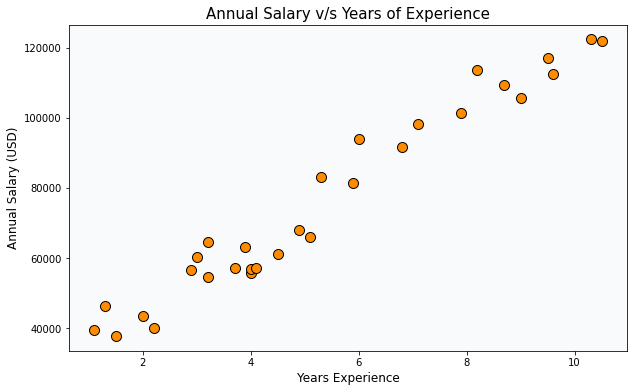

In [25]:
df.plot.scatter('YearsExperience', 'Salary',
                figsize=(10,6), color='darkorange',
                marker='o', edgecolor='k', s=100)
plt.xlabel('Years Experience', fontsize = 12)
plt.ylabel('Annual Salary (USD)', fontsize = 12)
plt.title('Annual Salary v/s Years of Experience', fontsize = 15)
plt.show()

One can see on plot that annual salaries of employees looks linearly correlated to years of experience !

## 2.Linear model definition

In statistics, linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression.

Let's define **y** as the real random variable to be explained (dependent) and **x** the explanatory variable (independent). The model supposes that on average, **y** is an affine function of **x**. The writing of the model implicitly supposes a preliminary notion of causality in the sense that **y** depends on **x**:

For a given sequence of **m** observations

${(x_i, y_i) \hspace{4mm}i=1 ..., m}$

$ y_i=\beta_{0} +\beta_{1}.x_i + \epsilon_i $

$ Using \hspace{3mm}matrix \hspace{3mm}notations \hspace{3mm}x = [x_1, x_2, ..., x_m]^T \hspace{3mm} and \hspace{3mm}  y = [y_1, y_2, ..., y_m]^T$

$The \hspace{3mm}model \hspace{3mm}is:\hspace{3mm} y = X.\beta + \epsilon$

$Where\hspace{3mm} X = [1 \hspace{3mm} x] \hspace{3mm}and\hspace{3mm} \beta= [\beta_{0} \hspace{3mm}\beta_{1}]^T$

The goal is to find the parameters which would provide the "best" fit in some sense for the data points:

$ \hat{y_i}=\hat{\beta_{0}} +\hat{\beta_{1}}.x_i $

### Converting data into arrays

To do calculations, we need to convert our data into arrays that will feed our custom model...

In [122]:
x = df["YearsExperience"].values.reshape(-1, 1)
y = df["Salary"].values.reshape(-1, 1)
print(x.shape, y.shape)

(30, 1) (30, 1)


...And add identity column vector to feature:

$X = [1 \hspace{3mm} x]$

in order to do the product:

$X.\beta \hspace{3mm}where\hspace{3mm}\beta= [\beta_{0} \hspace{3mm}\beta_{1}]^T$

In [123]:
X = np.hstack((np.ones(x.shape), x))
X[0:5]

array([[1. , 1.1],
       [1. , 1.3],
       [1. , 1.5],
       [1. , 2. ],
       [1. , 2.2]])

### Defining model

In [124]:
def model(X, Beta):
    return np.matmul(X, Beta)

### Parameters initialization

For visualization purpose, I added a constant value to Beta initial values.

In [125]:
Beta = np.random.randn(2, 1) + 10000
print(Beta)

[[10000.63920093]
 [ 9999.95848202]]


### Checking model's initial state

In [126]:
y_init = model(X, Beta)

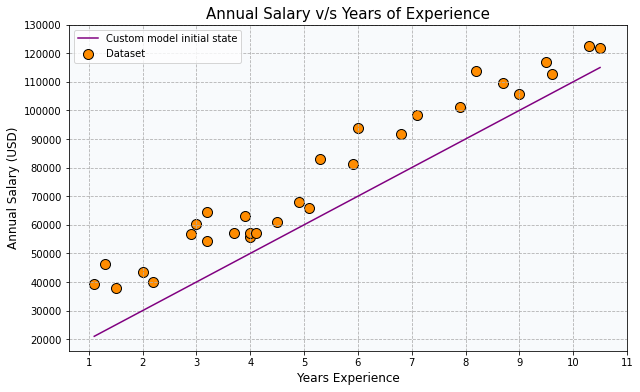

In [127]:
plt.figure(figsize=(10,6))

plt.plot(x, y_init, label='Custom model initial state',
         c= 'purple', marker='None', linestyle= 'solid')
plt.scatter(x, y, c= 'darkorange', label='Dataset', marker='o', edgecolor='k', s=100)
plt.legend(facecolor='white')
plt.title('Annual Salary v/s Years of Experience', fontsize = 15)
plt.xlabel('Years Experience', fontsize = 12)
plt.ylabel('Annual Salary (USD)', fontsize = 12)
plt.xticks(np.arange(1, 12, 1))
plt.yticks(np.arange(20000, 140000, 10000))
plt.grid(linestyle='--')

plt.show()

One clearly see that the model is not yet fitted to our data.

## 3.Loss function definition using Mean Squared Error (MSE)

From the previous equations, we know that the residuals are defined by:

$ \epsilon = y - X.\beta$

Then to measure the error of our model we define the Loss function as the mean of the squares of the residuals:

$ J(\beta) = \frac{1}{m} \sum (y - X.\beta)^2 $

In [154]:
def lossFunction(X, y, Beta):
        m = y.shape[0] # where m is the number of samples
        return 1/(m) * np.sum(np.square(y - model(X, Beta)))

The Loss is the value that we want to minimize in order to find the best regression line. Let's check the initial Loss value:

In [155]:
print(lossFunction(X, y, Beta))

199243474.14642814


Notice the high value of our Loss !! It can be possible to scale the values of the x feature in order to reduce the high values during the calculations ... but for this try we can stay with non scaled values.

## 4.Gradient definition

Now we calculate the gradient of the Loss function:

$\frac{\partial J(\beta) }{\partial \beta} = - \frac{2}{m} X^T.(y - X.\beta)$

But as we want to solve a minimization problem, we keep for calculations the gradient multiplied by -1:

In [156]:
def gradient(X, y, Beta):
    m = y.shape[0]
    return 2/m * np.matmul(X.T, model(X, Beta) - y)

Minimizing the Loss function means that its final gradient should be close to zero. Let's check the initial values of the gradient:

In [157]:
print(gradient(X, y, Beta))

[[ -25738.49612919]
 [-128193.59810319]]


## 5.Gradient descent algorithm

For each iteration of the calculus we update the parameters as well as the gradient of the model using the gradient descent algorithm:

$\beta' = \beta - \alpha \frac{\partial J(\beta) }{\partial \beta}$

In [158]:
def gradientDescent(X, y, Beta, learning_rate, n_iterations):
    loss_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        Beta = Beta - learning_rate * gradient(X, y, Beta)
        loss_history[i] = lossFunction(X, y, Beta)
    
    return Beta, loss_history, gradient(X, y , Beta)

## 6.Training the model on data

Fisrt I define the hypermarameters:

In [159]:
N_ITERATIONS = 20000
LEARNING_RATE = 0.001

Then I train the model on the data...

In [160]:
Final_Beta, loss_history, Final_gradient = gradientDescent(X, y, Beta, LEARNING_RATE, N_ITERATIONS)

... check the final values of the gradient (closer to zero as expected !) ...

In [161]:
print(Final_gradient)

[[-1.38763209]
 [ 0.20591879]]


... and get the final regression coefficients:

In [162]:
print(f"Intercept = {Final_Beta[0][0]:.2f}")
print(f"coefficient = {Final_Beta[1][0]:.2f}")

Intercept = 25788.92
coefficient = 9450.45


Let's have a look on the Learning Curve:

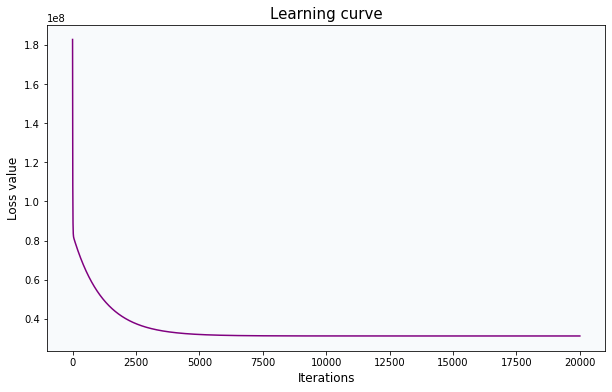

In [163]:
plt.figure(figsize=(10,6))
plt.plot(range(N_ITERATIONS), loss_history, c= 'purple')
plt.title('Learning curve', fontsize = 15)
plt.xlabel('Iterations', fontsize = 12)
plt.ylabel('Loss value', fontsize = 12)
plt.show()

## 7.Model evaluation

### Regression line visualization

In [90]:
y_pred_custom = model(X, Final_Beta)

Let's have a look on the regression line:

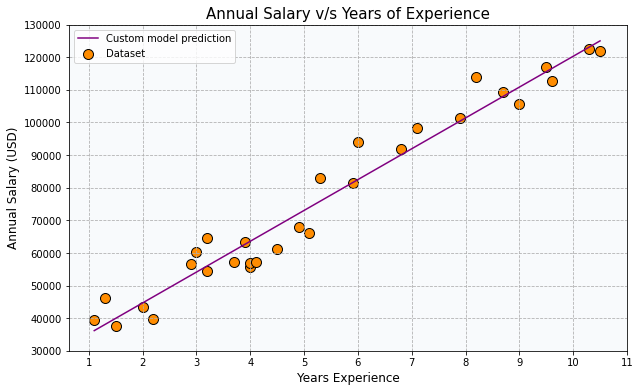

In [91]:
plt.figure(figsize=(10,6))

plt.plot(x, y_pred_custom, label='Custom model prediction',
         c= 'purple', marker='None', linestyle= 'solid')
plt.scatter(x, y, c= 'darkorange', label='Dataset', marker='o', edgecolor='k', s=100)
plt.legend(facecolor='white', loc="upper left")
plt.title('Annual Salary v/s Years of Experience', fontsize = 15)
plt.xlabel('Years Experience', fontsize = 12)
plt.ylabel('Annual Salary (USD)', fontsize = 12)
plt.xticks(np.arange(1, 12, 1))
plt.yticks(np.arange(30000, 140000, 10000))
plt.grid(linestyle='--')

plt.show()

We can see on plot that this time the model fits pretty good on the data !

### Salary estimation

Now let's imagine that we want to have an estimation of the salary for someone who have 12 years of experience in the company.

In [92]:
x_estimation = np.array([12])
X_estimation = np.hstack((np.ones(x_estimation.shape), x_estimation))
y_estimation = model(X_estimation, Final_Beta)

print(f'The estimated annual salary of someone who has 12 years of experience is \
{y_estimation[0]:.0f} USD \n... according to our dataset.')

The estimated annual salary of someone who has 12 years of experience is 139194 USD 
... according to our dataset.


Let's visualize the result on the plot:

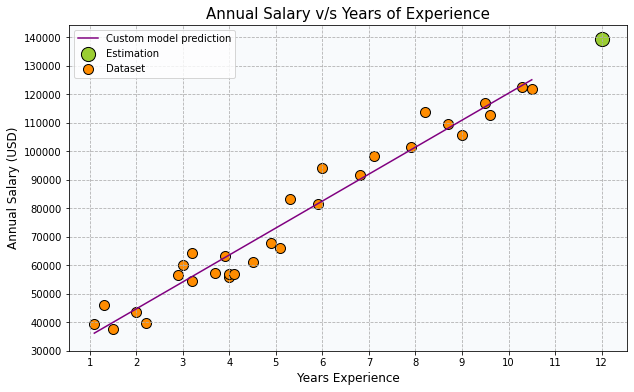

In [93]:
plt.figure(figsize=(10,6))

plt.scatter(x_estimation, y_estimation, label='Estimation',
            c= 'yellowgreen', marker='o', edgecolor='k', s=200)
plt.plot(x, y_pred_custom, label='Custom model prediction',
         c= 'purple', marker='None', linestyle= 'solid')
plt.scatter(x, y, c= 'darkorange', label='Dataset', marker='o', edgecolor='k', s=100)
plt.legend(facecolor='white', loc="upper left")
plt.title('Annual Salary v/s Years of Experience', fontsize = 15)
plt.xlabel('Years Experience', fontsize = 12)
plt.ylabel('Annual Salary (USD)', fontsize = 12)
plt.xticks(np.arange(1, 13, 1))
plt.yticks(np.arange(30000, 150000, 10000))
plt.grid(linestyle='--')

plt.show()

One can see on plot the estimated salary for someone who has 12 years of experience in the company.

### Coefficient of determination

This coefficient indicates the quality of predictions made with our model.

$ R^2 = 1 - \frac{\sum ((y_i - \hat{y_i})^2}{\sum ((y_i - \bar{y})^2)} $

In [94]:
def determinationCoef(y, y_pred):
    SSR = ((y - y_pred)**2).sum()    # Residual sum of squares SSR
    SST = ((y - y.mean())**2).sum()  # Total sum of squares SST
    return np.sqrt(1 - SSR/SST)

In [95]:
print(f"R2 = {determinationCoef(y, y_pred_custom):0.2f}")

R2 = 0.98


We almost reach the maximum value of 1 !! The model can estimate accuratly any salary given the number of years of experience of an employee in the company.

## 8.Comparison with sklearn LinearRegression model

Scikit-Learn already provides a well built Linear Regression model for general purpose (linear, multi-linear or polynomial regressions). <br/>
I will apply it on the Salary_data.csv dataset in order to compare and check the quality of my custom linear regression model.

As I've done previously, I define X, y variables

In [96]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1, 1)
print(X.shape, y.shape)

(30, 1) (30, 1)


Next I define a linear regression model using Sklearn library...

In [97]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

...fit the model to the data...

In [98]:
LR_model.fit(X, y)

LinearRegression()

...and get the resulting regression coefficients

In [99]:
print(f"Intercept = {LR_model.intercept_[0]:.2f}")
print(f"coefficient = {LR_model.coef_[0][0]:.2f}")

Intercept = 25792.20
coefficient = 9449.96


Now let's see how well the model fits to the data

In [100]:
y_pred_sklearn = LR_model.predict(X)

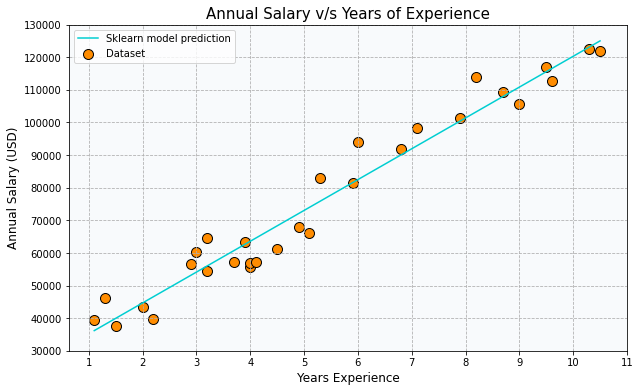

In [101]:
plt.figure(figsize=(10,6))

plt.plot(X, y_pred_sklearn, label='Sklearn model prediction',
         c= 'darkturquoise', marker='None', linestyle= 'solid')
plt.scatter(X, y, c= 'darkorange', label='Dataset', marker='o', edgecolor='k', s=100)
plt.legend(facecolor='white', loc="upper left")
plt.title('Annual Salary v/s Years of Experience', fontsize = 15)
plt.xlabel('Years Experience', fontsize = 12)
plt.ylabel('Annual Salary (USD)', fontsize = 12)
plt.xticks(np.arange(1, 12, 1))
plt.yticks(np.arange(30000, 140000, 10000))
plt.grid(linestyle='--')

plt.show()

Salary estimation:

In [102]:
X_estimation = np.array([12]).reshape(-1,1)
y_estimation = LR_model.predict(X_estimation)

print(f'The estimated annual salary of someone who has 12 years of experience is \
{y_estimation[0][0]:.0f} USD')

The estimated annual salary of someone who has 12 years of experience is 139192 USD


## 9.Conclusion

**The custom model build from scratch looks pretty good to predict salary given years of experience and fits pretty well to the data, thus I get a R2 determination coefficient of 0.98 (almost 1) that indicates a good quality of predictions.**

**Comparing coefficients of regression and estimated salaries for both models, one can see that the custom model gives the same results as the Sklearn model.**

In [104]:
import tabulate
import pandas as pd
results = {
    'Model': ["Custom LR model", 'Sklearn LR model'],
    'Intercetp': [25788.92, 25792.20],
    'coefficient': [9450.45, 9449.96],
    '12 Years exp. estimated Ann. Salary': [139194, 139192]}

df_results = pd.DataFrame(data=results).set_index('Model')
print(df_results.to_markdown())

| Model            |   Intercetp |   coefficient |   12 Years exp. estimated Ann. Salary |
|:-----------------|------------:|--------------:|--------------------------------------:|
| Custom LR model  |     25788.9 |       9450.45 |                                139194 |
| Sklearn LR model |     25792.2 |       9449.96 |                                139192 |


**Now we have a rather precise tool which can help human resources to estimate the annual salary of an employee of this anonymous company according to his number of experience in this company.**